## The diffSph example notebook
Welcome to the example notebook of diffSph! In the following lines, we want to give you a short overview over the capabilities of this Python library. For additional information, please refer to the [documentation website](https://mertio1.github.io/diffsph/), the publication or the Readme on the [GitHub page](https://github.com/mertio1/diffsph). 


In [1]:
from diffsph import limits as lim  # For WIMP cross-sections and decay rates in dSphs
from diffsph import pyflux as pf # For dSph brightness calculations 

import matplotlib.pyplot as plt # Additional imports
import numpy as np

%matplotlib inline

### 1. Brightness profiles
Let's start with the brightness-profiles we would expect from a dSph due to WIMPs following a given density profile (here called radial template or `rad_temp` as parameter) with a certain mass `mchi`. For this, we use the function `synch_brightness(...)` from diffSph's pyflux-module.
In general, the brightness profile of a dSph depends on three things: The set of galactic parameters (e.g. galactic size), the DM halo model and WIMP-specific parameters.
For our example, we choose a density profile described by [Geringer-Sameth et al. 2015](https://arxiv.org/abs/1408.0002) (the value of the parameter `ref` links to the publication by either using the arxiv-code '1408.0002' or the first authors last name 'Geringer-Sameth'). We furthermore choose a WIMP mass of 100 GeV and an annihilation rate of $3\cdot 10^{-26}$ cm$^3$s$^{-1}$, an oberservation frequency of 150 MHz.
We are interested in several decay channels (defined below in the list `ch_list`) and how the profile might change for several dwarf spheroidals (five of our example galaxies are defined in `dsph_list`). We assign individual lists to each decay channel, since that eases up plotting later on.


In [4]:
theta_grid = [15 * i / 1000 for i in range(0,1000)]   # Angle grid in arcmin ("x-values")

dsph_list = ['Ursa Major II', 'Fornax', 'Ursa Minor', 'Sextans', 'Canes Venatici I']  # List of satellite galaxies
ch_list = ['ee', 'mumu', 'tautau', 'qq', 'bb', 'WW',]  # For multiple decay channels

# diffsph's computations at nu = 150 MHz and for the given model
Inu_ee = [[pf.synch_brightness(th, nu = .150, galaxy = gal, rad_temp = 'HDZ', hyp = 'wimp', ref = '1408.0002', sv = 3e-26, mchi = 100, channel = 'ee', high_res = True, accuracy = .1)  for th in theta_grid] for gal in dsph_list]

Inu_mumu = [[pf.synch_brightness(th, nu = .150, galaxy = gal, rad_temp = 'HDZ', hyp = 'wimp', ref = '1408.0002', sv = 3e-26, mchi = 100, channel = 'mumu', high_res = True, accuracy = .1) for th in theta_grid] for gal in dsph_list]

Inu_tautau = [[pf.synch_brightness(th, nu = .150, galaxy = gal, rad_temp = 'HDZ',  hyp = 'wimp', ref = '1408.0002', sv = 3e-26, mchi = 100, channel = 'tautau', high_res = True, accuracy = .1) for th in theta_grid] for gal in dsph_list]

Inu_qq = [[pf.synch_brightness(th, nu = .150, galaxy = gal, rad_temp = 'HDZ', hyp = 'wimp', ref = '1408.0002', sv = 3e-26, mchi = 100, channel = 'qq', high_res = True, accuracy = .1) for th in theta_grid] for gal in dsph_list]

Inu_bb = [[pf.synch_brightness(th, nu = .150, galaxy = gal, rad_temp = 'HDZ', hyp = 'wimp', ref = '1408.0002', sv = 3e-26, mchi = 100, channel = 'bb', high_res = True, accuracy = .1) for th in theta_grid] for gal in dsph_list]

Inu_WW = [[pf.synch_brightness(th, nu = .150, galaxy = gal, rad_temp = 'HDZ', hyp = 'wimp', ref = '1408.0002', sv = 3e-26, mchi = 100, channel = 'WW', high_res = True, accuracy = .1) for th in theta_grid] for gal in dsph_list]



Now it's time for plotting our data. We plot all profiles related to the same decay channel into one figure. We note that since the example galaxies all have different sizes, we expect varying FWHMs on each profile. Profiles related to the same dSph are denoted with matching colors thoughout all figures. 
The following code is just matplotlib-basics but take a look onto the resulting figure.

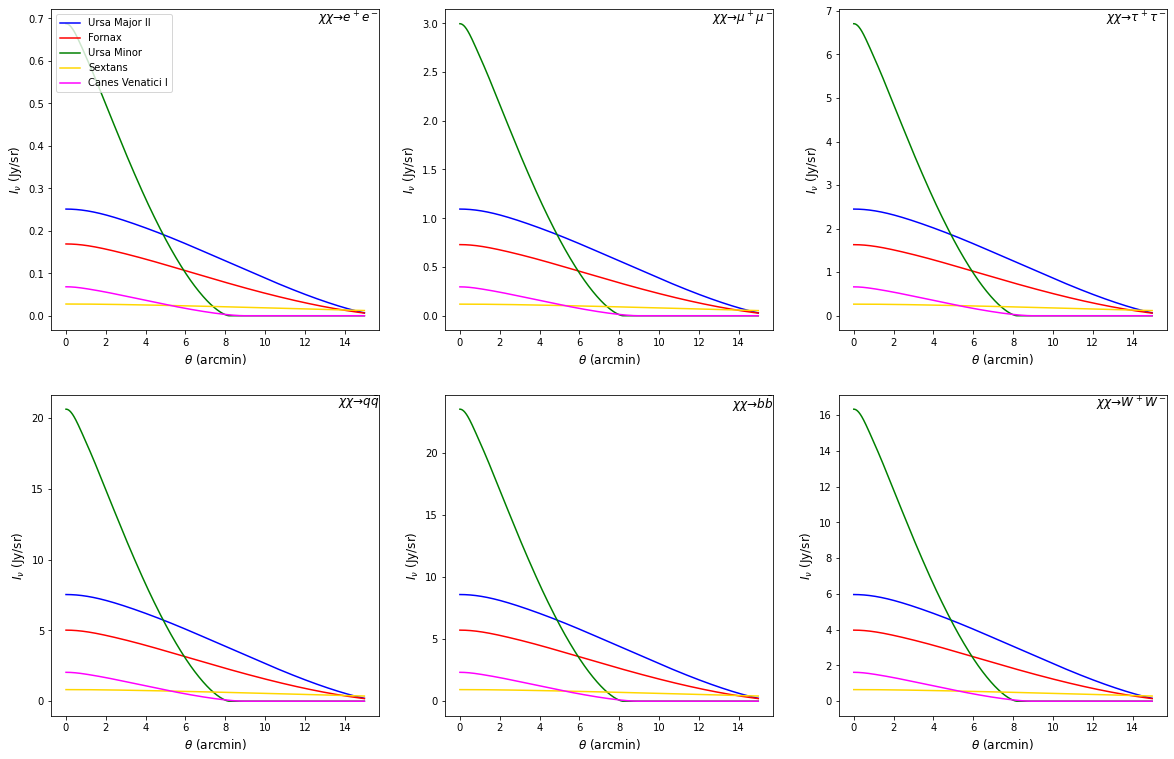

In [5]:
colors = ['blue', 'red', 'green', 'gold', 'magenta']  # For plotting in different colors

fig, ax =plt.subplots(nrows=2,ncols=3, figsize=(20,13))

for i in range(0,len(dsph_list)):
    ax[0][0].plot(theta_grid, Inu_ee[i], linestyle="solid", label = dsph_list[i], color=colors[i])
ax[0][0].legend(loc = 'upper left')
ax[0][0].set_xlabel(r'$\theta$ (arcmin)', size = 'large')
ax[0][0].set_ylabel(r'$I_\nu$ (Jy/sr)', size = 'large')
ax[0][0].text(ax[0][0].get_xlim()[1], ax[0][0].get_ylim()[1], r'$\chi\chi \to e^+e^-$', size = 'large', horizontalalignment='right', verticalalignment='top')

for i in range(0,len(dsph_list)):
    ax[0][1].plot(theta_grid, Inu_mumu[i], linestyle="solid", label = dsph_list[i], color=colors[i])
ax[0][1].set_xlabel(r'$\theta$ (arcmin)', size = 'large')
ax[0][1].set_ylabel(r'$I_\nu$ (Jy/sr)', size = 'large')
ax[0][1].text(ax[0][1].get_xlim()[1], ax[0][1].get_ylim()[1], r'$\chi\chi \to \mu^+\mu^-$', size = 'large', horizontalalignment='right', verticalalignment='top')

for i in range(0,len(dsph_list)):
    ax[0][2].plot(theta_grid, Inu_tautau[i], linestyle="solid", label = dsph_list[i], color=colors[i])
ax[0][2].set_xlabel(r'$\theta$ (arcmin)', size = 'large')
ax[0][2].set_ylabel(r'$I_\nu$ (Jy/sr)', size = 'large')
ax[0][2].text(ax[0][2].get_xlim()[1], ax[0][2].get_ylim()[1], r'$\chi\chi \to \tau^+\tau^-$', size = 'large', horizontalalignment='right', verticalalignment='top')

for i in range(0,len(dsph_list)):
    ax[1][0].plot(theta_grid, Inu_qq[i], linestyle="solid", label = dsph_list[i], color=colors[i])
ax[1][0].set_xlabel(r'$\theta$ (arcmin)', size = 'large')
ax[1][0].set_ylabel(r'$I_\nu$ (Jy/sr)', size = 'large')
ax[1][0].text(ax[1][0].get_xlim()[1], ax[1][0].get_ylim()[1], r'$\chi\chi \to q\bar{q}$', size = 'large', horizontalalignment='right', verticalalignment='top')

for i in range(0,len(dsph_list)):
    ax[1][1].plot(theta_grid, Inu_bb[i], linestyle="solid", label = dsph_list[i], color=colors[i])
ax[1][1].set_xlabel(r'$\theta$ (arcmin)', size = 'large')
ax[1][1].set_ylabel(r'$I_\nu$ (Jy/sr)', size = 'large')
ax[1][1].text(ax[1][1].get_xlim()[1], ax[1][1].get_ylim()[1], r'$\chi\chi \to b\bar{b}$', size = 'large', horizontalalignment='right', verticalalignment='top')

for i in range(0,len(dsph_list)):
    ax[1][2].plot(theta_grid, Inu_WW[i], linestyle="solid", label = dsph_list[i], color=colors[i])
ax[1][2].set_xlabel(r'$\theta$ (arcmin)', size = 'large')
ax[1][2].set_ylabel(r'$I_\nu$ (Jy/sr)', size = 'large')
ax[1][2].text(ax[1][2].get_xlim()[1], ax[1][2].get_ylim()[1], r'$\chi\chi \to W^+W^-$', size = 'large', horizontalalignment='right', verticalalignment='top')

plt.show()

### 2. Limits on the WIMP self-annihilation cross-section and the decay rate
A second question that can be answered easily with diffSph is how the self-annihilation cross-section $\langle\sigma v\rangle$ and the decay rate $\Gamma_d$ of WIMPs change with the particle mass. We follow the theoretical approach described in [Vollmann, 2020](https://iopscience.iop.org/article/10.1088/1475-7516/2021/04/068), [Vollmann et al., 2020](https://academic.oup.com/mnras/article/496/3/2663/5857185?login=false) and [Gajovic et al., 2023](https://www.aanda.org/articles/aa/full_html/2023/05/aa45508-22/aa45508-22.html), who focus on WIMP non-detection, with a diffusion power-law factor of $3\cdot 10^{27}$ cm$^2$ s$^{-1}$ with a power-law index of 1/3 (Kolmogorov turbulence model, hence we use 'kol' as value for the parameter `delta`) and a RMS magnetic field strength of $1 \mu$G. In addition to the observation frequency, we have to add further information regarding the observation, such as the `rms_noise` and the `beam_size`. 
The other parameters are described further above. We now focus on the self-annihilation cross-section and decay rate for the dwarf spheroidal galaxy Canes Venatici I. We can calculate the limits with diffSph's limits module, using the functions `sigmav_limest(...)` and `decay_rate_limest(...)` with the above described parameters.

In [6]:
mass_grid = np.logspace(0,4,100)  # Particle masses ("x-values")

ch_list = ['ee', 'mumu', 'tautau', 'qq', 'bb', 'WW',]  # For multiple decay channels

sigmav = [[lim.sigmav_limest(
    nu=.144, rms_noise=200, beam_size=20, galaxy='Canes Venatici I', 
    rad_temp='HDZ', ratio = 1, D0 = 1e27, delta = 'kol', B = 1, mchi = m, 
    channel = ch, self_conjugate = True, manual = False, high_res = False, 
    accuracy = .1, ref = '1408.0002') for m in mass_grid] for ch in ch_list]

decay = [[lim.decay_rate_limest(
    nu=.144, rms_noise=200, beam_size=20, galaxy='Canes Venatici I', 
    rad_temp='HDZ', ratio = 1, D0 = 1e27, delta = 'kol', B = 1, mchi = m, 
    channel = ch, self_conjugate = True, manual = False, high_res = False, 
    accuracy = .1, ref = '1408.0002') for m in mass_grid] for ch in ch_list]

Finally again the plotting part (in terms of diffSph, this is nothing special, except of the final plot)

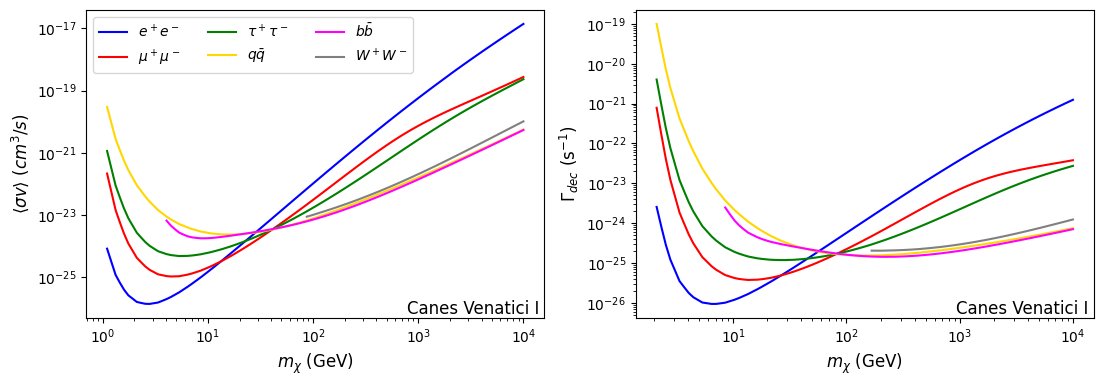

In [9]:
colors = ['blue', 'red', 'green', 'gold', 'magenta', 'grey']
ch_labels = [r'$e^+e^-$', r'$\mu^+\mu^-$', r'$\tau^+\tau^-$', r'$q\bar{q}$', r'$b\bar{b}$', r'$W^+W^-$']

fig, ax = plt.subplots(ncols=2, figsize=(13,4))
for i in range(0, 6):
    ax[0].loglog(mass_grid, sigmav[i], color=colors[i], label = ch_labels[i])
ax[0].legend(loc = 'upper left', ncols = 3)
ax[0].set_xlabel(r'$m_\chi$ (GeV)', size = 'large')
ax[0].set_ylabel(r'$\langle \sigma v\rangle$ ($cm^{3}/s$)', size = 'large')
# ax[0].set_title(r'diffsph 2$\sigma$ limit estimates on DM self-annihilation')
ax[0].text(ax[0].get_xlim()[1], ax[0].get_ylim()[0], 'Canes Venatici I ', horizontalalignment = 'right', size = 'large', verticalalignment='bottom');
for i in range(0, 6):
    ax[1].loglog(mass_grid, decay[i], color=colors[i], label = ch_labels[i])
ax[1].set_xlabel(r'$m_\chi$ (GeV)', size = 'large')
ax[1].set_ylabel(r'$\Gamma_{dec}$ (s${}^{-1}$)', size = 'large')
# ax[1].set_title(r'diffsph 2$\sigma$ limit estimates on DM decay')
ax[1].text(ax[1].get_xlim()[1], ax[1].get_ylim()[0], 'Canes Venatici I ', horizontalalignment = 'right', size = 'large', verticalalignment='bottom');